In [161]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.impute import KNNImputer, SimpleImputer, MissingIndicator
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [162]:
df = pd.read_csv('train.csv', usecols = ['Age', 'Pclass', 'Fare', 'Survived'])

In [163]:
df

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500
...,...,...,...,...
886,0,2,27.0,13.0000
887,1,1,19.0,30.0000
888,0,3,NaN,23.4500
889,1,1,26.0,30.0000


In [164]:
X = df.drop(columns = ['Survived'])
y = df['Survived']

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [166]:
knn1 = KNNImputer(n_neighbors = 3, weights = 'distance')

X_train_knn1 = knn.fit_transform(X_train)
X_test_knn1 = knn.transform(X_test)

In [167]:
lr1 = LogisticRegression()

X_train_lr1 = lr1.fit(X_train_knn1, y_train)
y_pred1 = lr1.predict(X_test_knn1)

accuracy_score(y_test, y_pred1)

0.7150837988826816

In [168]:
##  comparison with simple imputer

si1 = SimpleImputer()

X_train_si1 = si1.fit_transform(X_train)
X_test_si1 = si1.transform(X_test)

In [169]:
lr2 = LogisticRegression()
X_train_lr2 = lr2.fit(X_train_si1, y_train)
y_pred2 = lr2.predict(X_test_si1)
accuracy_score(y_pred2, y_test)

0.6927374301675978

## random sample imputation

In [170]:
X_train.isnull().sum()

Pclass      0
Age       148
Fare        0
dtype: int64

In [171]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [172]:
# Fill missing values in X_train['Age_imputed']
X_train.loc[X_train['Age_imputed'].isnull(), 'Age_imputed'] = (
    X_train['Age'].dropna().sample(n=X_train['Age_imputed'].isnull().sum(), random_state=42, replace=True).values
)

# Fill missing values in X_test['Age_imputed']
X_test.loc[X_test['Age_imputed'].isnull(), 'Age_imputed'] = (
    X_train['Age'].dropna().sample(n=X_test['Age_imputed'].isnull().sum(), random_state=42, replace=True).values
)


In [173]:
X_train

,Pclass,Age,Fare,Age_imputed
30,1,40.0,27.7208,40.0
10,3,4.0,16.7000,4.0
873,3,47.0,9.0000,47.0
182,3,9.0,31.3875,9.0
876,3,20.0,9.8458,20.0
...,...,...,...,...
534,3,30.0,8.6625,30.0
584,3,NaN,8.7125,21.0
493,1,71.0,49.5042,71.0
527,1,NaN,221.7792,14.0


C:\Users\Nadim Ansari\AppData\Local\Temp\ipykernel_14492\1291076797.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'], label = 'Original', hist = False)
C:\Users\Nadim Ansari\AppData\Local\Temp\ipykernel_14492\1291076797.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  s

NameError: name 'plt' is not defined

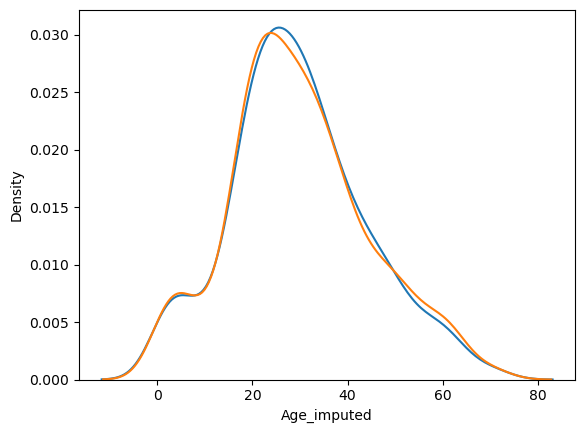

In [174]:
sns.distplot(X_train['Age'], label = 'Original', hist = False)
sns.distplot(X_train['Age_imputed'], label = 'Imputed', hist = False)
plt.legend()
plt.show()

In [ ]:
print('Original variable variance', X_train['Age'].var())
print('Variance after imputed value', X_train['Age_imputed'].var())

In [175]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,47.898304
Age,71.512440,204.349513,204.349513
Age_imputed,47.898304,204.349513,213.491432


<Axes: >

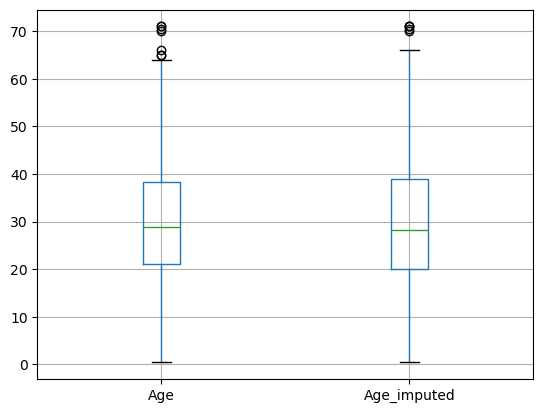

In [176]:
X_train[['Age','Age_imputed']].boxplot()

In [177]:
X_train

,Pclass,Age,Fare,Age_imputed
30,1,40.0,27.7208,40.0
10,3,4.0,16.7000,4.0
873,3,47.0,9.0000,47.0
182,3,9.0,31.3875,9.0
876,3,20.0,9.8458,20.0
...,...,...,...,...
534,3,30.0,8.6625,30.0
584,3,NaN,8.7125,21.0
493,1,71.0,49.5042,71.0
527,1,NaN,221.7792,14.0


In [178]:
X_train_trf = X_train[['Pclass', 'Fare', 'Age_imputed']]
X_test_trf = X_test[['Pclass', 'Fare', 'Age_imputed']]

In [179]:
X_test.isnull().sum()

Pclass          0
Age            29
Fare            0
Age_imputed     0
dtype: int64

In [180]:
from sklearn.linear_model import LogisticRegression
lr3 = LogisticRegression()
lr3.fit(X_train_trf, y_train)
y_pred3 = lr3.predict(X_test_trf)
accuracy_score(y_test, y_pred3)

0.6759776536312849

In [181]:
mi = MissingIndicator()
X_train_mi = mi.fit_transform(X_train)
X_test_mi = mi.transform(X_test)

In [182]:
## im using lr3 which is used previously

lr3.fit(X_train_mi, y_train)
y_pred4 = lr3.predict(X_test_mi)
## im using lr3 which is used previously
accuracy_score(y_test, y_pred4)

0.5586592178770949

In [183]:
X_train_new = X_train[['Pclass', 'Age', 'Fare']]
X_test_new = X_test[['Pclass', 'Age', 'Fare']]

In [184]:
mi = MissingIndicator()
X_train_mi2 = mi.fit_transform(X_train_new)
X_test_mi2 = mi.transform(X_test_new)

In [185]:
lr5 = LogisticRegression()

lr5.fit(X_train_mi2, y_train)
y_pred5 = lr5.predict(X_test_mi2)
accuracy_score(y_test, y_pred5)

0.5586592178770949

In [186]:
X_train_new

,Pclass,Age,Fare
30,1,40.0,27.7208
10,3,4.0,16.7000
873,3,47.0,9.0000
182,3,9.0,31.3875
876,3,20.0,9.8458
...,...,...,...
534,3,30.0,8.6625
584,3,NaN,8.7125
493,1,71.0,49.5042
527,1,NaN,221.7792


In [187]:
##  automatically select imputer parameter

In [188]:
data = pd.read_csv('train.csv')

In [189]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [190]:
data.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace = True)

In [211]:
A = data.drop(columns = ['Survived'])
b = data['Survived']

In [212]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(A, b, test_size = 2, random_state = 42)

In [213]:
numerical_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', StandardScaler())
])

In [214]:
categorical_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'most frequent')),
    ('ohe', OneHotEncoder(handle_unknown = 'ignore'))
])

In [215]:
preprocessor = ColumnTransformer(
    transformers = [
        ('num', numerical_transformer, ['Age', 'Fare']),
        ('cat', categorical_transformer, ['Embarked', 'Sex'])
    ]
)

In [216]:
clf = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [217]:
from sklearn import set_config

set_config(display = 'diagram')
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most '
                                                                                          'frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Embarked', 'Sex'])])),
                ('classifier', LogisticRegression())])

In [218]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'preprocessor__cat__imputer__strategy': ['most_frequent', 'constant'],
    'classifier__C': [0.1, 1.0, 10, 100]
}

grid_search = GridSearchCV(clf, param_grid, cv=10)

In [219]:
grid_search.fit(X_train1, y_train1)

print(f"Best params:")
print(grid_search.best_params_)

Best params:
{'classifier__C': 0.1, 'preprocessor__cat__imputer__strategy': 'most_frequent', 'preprocessor__num__imputer__strategy': 'mean'}


In [220]:
X_train

,Pclass,Age,Fare
840,3,20.0,7.9250
720,2,6.0,33.0000
39,3,14.0,11.2417
290,1,26.0,78.8500
300,3,NaN,7.7500
...,...,...,...
106,3,21.0,7.6500
270,1,NaN,31.0000
860,3,41.0,14.1083
435,1,14.0,120.0000


In [221]:
X_train1

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
840,3,male,20.0,0,0,7.9250,S
720,2,female,6.0,0,1,33.0000,S
39,3,female,14.0,1,0,11.2417,C
290,1,female,26.0,0,0,78.8500,S
300,3,female,NaN,0,0,7.7500,Q
...,...,...,...,...,...,...,...
106,3,female,21.0,0,0,7.6500,S
270,1,male,NaN,0,0,31.0000,S
860,3,male,41.0,2,0,14.1083,S
435,1,female,14.0,1,2,120.0000,S


In [222]:
print(f"Internal CV score: {grid_search.best_score_:.3f}")

Internal CV score: 0.784


In [223]:
import pandas as pd

cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results = cv_results.sort_values("mean_test_score", ascending=False)
cv_results[['param_classifier__C','param_preprocessor__cat__imputer__strategy','param_preprocessor__num__imputer__strategy','mean_test_score']]

,param_classifier__C,param_preprocessor__cat__imputer__strategy,param_preprocessor__num__imputer__strategy,mean_test_score
0,0.1,most_frequent,mean,0.784104
2,0.1,constant,mean,0.784104
1,0.1,most_frequent,median,0.782980
3,0.1,constant,median,0.782980
4,1.0,most_frequent,mean,0.782980
5,1.0,most_frequent,median,0.782980
6,1.0,constant,mean,0.782980
7,1.0,constant,median,0.782980
8,10.0,most_frequent,mean,0.782980
10,10.0,constant,mean,0.782980


In [224]:
print(f"Internal CV score: {grid_search.best_score_:.3f}")

Internal CV score: 0.784


In [225]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results = cv_results.sort_values("mean_test_score", ascending=False)
cv_results[['param_classifier__C','param_preprocessor__cat__imputer__strategy','param_preprocessor__num__imputer__strategy','mean_test_score']]

,param_classifier__C,param_preprocessor__cat__imputer__strategy,param_preprocessor__num__imputer__strategy,mean_test_score
0,0.1,most_frequent,mean,0.784104
2,0.1,constant,mean,0.784104
1,0.1,most_frequent,median,0.782980
3,0.1,constant,median,0.782980
4,1.0,most_frequent,mean,0.782980
5,1.0,most_frequent,median,0.782980
6,1.0,constant,mean,0.782980
7,1.0,constant,median,0.782980
8,10.0,most_frequent,mean,0.782980
10,10.0,constant,mean,0.782980
